In [32]:
train_size = 47500

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import time
from sklearn.model_selection import cross_validate
%matplotlib inline

In [2]:
np.set_printoptions(precision=9)
np.set_printoptions(linewidth=np.inf)

In [3]:
X = np.load('../../X_train.npz')['arr_0']
Y = np.load('../../Y_train.npz')['arr_0']
TX = np.load('../../X_test.npz')['arr_0']

In [4]:
XTX = np.concatenate((X, TX), axis=0)

In [5]:
XTX_square = XTX ** 2
XTX_cumsum = np.concatenate((np.cumsum(XTX[:, :5000], axis=1), np.cumsum(XTX[:, 5000:], axis=1)), axis=1)
XTX_all = np.concatenate((XTX, XTX_square, XTX_cumsum), axis=1)

In [6]:
XTX_all.shape

(50000, 30000)

In [7]:
# Variance Threshold
var = XTX_all.var(axis=0)

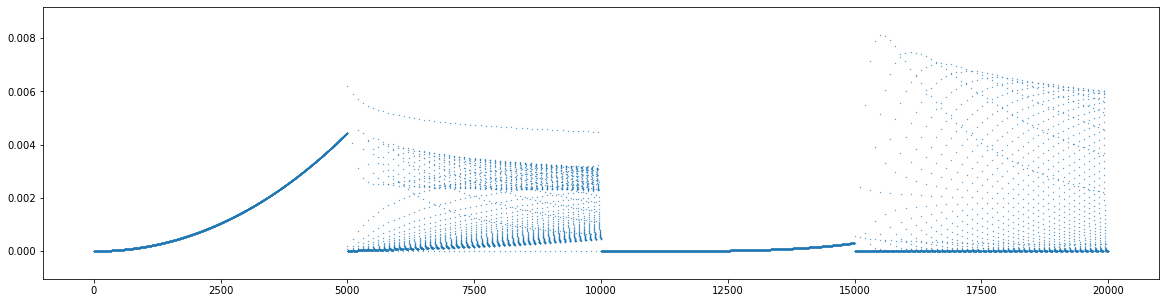

In [16]:
plt.figure(figsize=(20, 5))
plt.scatter(range(20000), var[:20000], s=0.1)

In [33]:
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=100,
                        n_jobs=-1)

In [59]:
# calculate type 1 error
def err1(y, y_pred):
    return np.sum(1.0 * np.abs(y_pred - y)) / len(y_pred)

# calculate type 2 errr
def err2(y, y_pred):
    return np.sum(np.abs(y_pred - y) / y) / len(y_pred)

In [31]:
cross_validate(gbm, X[:train_size], Y[:train_size, 0], 
               scoring=
               cv=5, 
               n_jobs=1,
               verbose=1,
               return_train_score=True,)

In [37]:
t = time.time()
gbm.fit(XTX_all[:45000], Y[:45000, 0], 
        eval_set=[(XTX_all[45000:47500], Y[45000:47500, 0])], 
        eval_metric='l1', 
        early_stopping_rounds=5)
print(time.time() - t)

[1]	valid_0's l1: 0.246823	valid_0's l2: 0.0801938
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.239272	valid_0's l2: 0.075318
[3]	valid_0's l1: 0.232278	valid_0's l2: 0.0709112
[4]	valid_0's l1: 0.225698	valid_0's l2: 0.0669072
[5]	valid_0's l1: 0.219521	valid_0's l2: 0.0632918
[6]	valid_0's l1: 0.213649	valid_0's l2: 0.0599666
[7]	valid_0's l1: 0.208144	valid_0's l2: 0.0569631
[8]	valid_0's l1: 0.202833	valid_0's l2: 0.0541556
[9]	valid_0's l1: 0.197945	valid_0's l2: 0.0516045
[10]	valid_0's l1: 0.193234	valid_0's l2: 0.0492339
[11]	valid_0's l1: 0.188833	valid_0's l2: 0.047087
[12]	valid_0's l1: 0.184743	valid_0's l2: 0.045107
[13]	valid_0's l1: 0.180924	valid_0's l2: 0.0433125
[14]	valid_0's l1: 0.177234	valid_0's l2: 0.0416534
[15]	valid_0's l1: 0.173823	valid_0's l2: 0.0401341
[16]	valid_0's l1: 0.170589	valid_0's l2: 0.0387506
[17]	valid_0's l1: 0.167493	valid_0's l2: 0.0374324
[18]	valid_0's l1: 0.16458	valid_0's l2: 0.0362434
[19]	valid_0's l

In [46]:
impt = gbm.feature_importances_

In [47]:
print(impt[0], var[0])

511 1.7040001149621759e-12


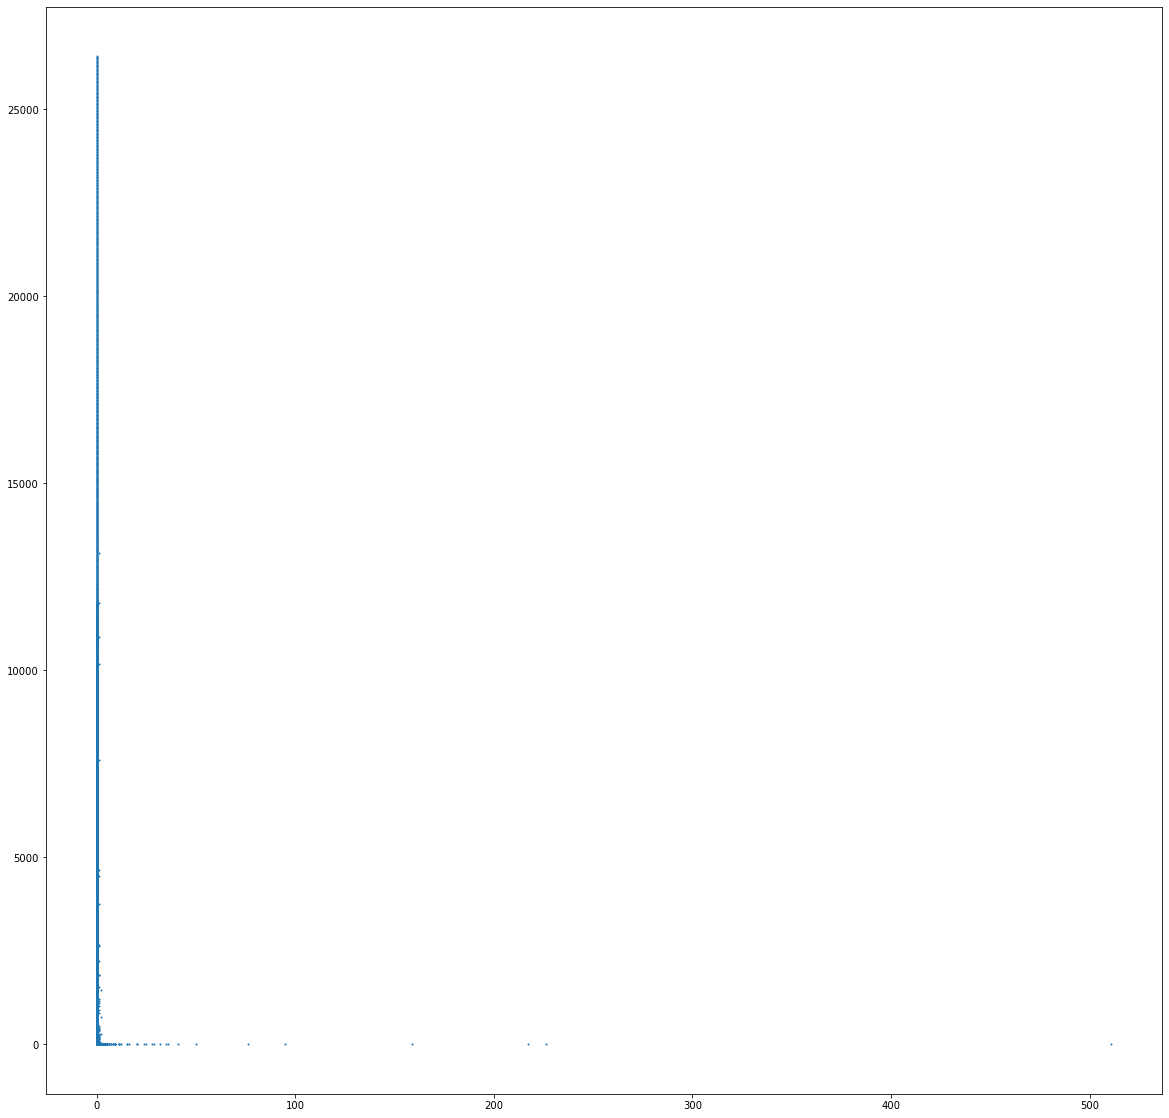

In [52]:
plt.figure(figsize=(20, 20))
plt.scatter(impt, var, s=1)

In [56]:
err2(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 0])

0.2523223070002524

In [57]:
err1(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 0])

30.26941341851931

In [58]:
ty0 = gbm.predict(XTX_all[47500:])

In [ ]:
gbm2 = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=100,
                        n_jobs=-1)

t = time.time()
gbm2.fit(XTX_all[:45000], Y[:45000, 1], 
        eval_set=[(XTX_all[45000:47500], Y[45000:47500, 1])], 
        eval_metric='l1', 
        early_stopping_rounds=5)
print(time.time() - t)

err1(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 0])
err2(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 0])

[1]	valid_0's l1: 55.1016	valid_0's l2: 4047.7
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 53.3647	valid_0's l2: 3800.79
[3]	valid_0's l1: 51.7185	valid_0's l2: 3577.06
[4]	valid_0's l1: 50.1581	valid_0's l2: 3370.48
[5]	valid_0's l1: 48.6942	valid_0's l2: 3182.69
[6]	valid_0's l1: 47.3366	valid_0's l2: 3013.31
[7]	valid_0's l1: 45.9937	valid_0's l2: 2852.09


In [ ]:
err1(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 1])
err2(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 1])

In [ ]:
ty1 = gbm2.predict(XTX_all[47500:])

In [ ]:
gbm3 = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=100,
                        n_jobs=-1)

t = time.time()
gbm3.fit(XTX_all[:45000], Y[:45000, 2], 
        eval_set=[(XTX_all[45000:47500], Y[45000:47500, 2])], 
        eval_metric='l1', 
        early_stopping_rounds=5)
print(time.time() - t)

err1(200.0 * gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 2])
err2(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 2])

In [ ]:
ty2 = gbm3.predict(XTX_all[47500:])